In [1]:
from ultralytics import YOLO

modelYolo = YOLO('../../models/yolov8n-face.pt')

In [2]:
# results = modelYolo('https://ultralytics.com/images/bus.jpg')  # predict on an image
results = modelYolo.track("/home/vorkov/Pictures/Webcam/2023-11-16-190519.jpg")
results

/home/vorkov/anaconda/envs/EDA/lib/python3.9/site-packages/torch/cuda/__init__.py:138: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at /opt/conda/conda-bld/pytorch_1699449200967/work/c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0

image 1/1 /home/vorkov/Pictures/Webcam/2023-11-16-190519.jpg: 384x640 1 face, 37.4ms
Speed: 1.2ms preprocess, 37.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'face'}
 orig_img: array([[[112, 138, 129],
         [112, 138, 130],
         [113, 138, 132],
         ...,
         [ 79,  95,  94],
         [ 77,  97,  94],
         [ 76,  98,  95]],
 
        [[112, 137, 128],
         [113, 137, 129],
         [113, 137, 131],
         ...,
         [ 78,  94,  93],
         [ 76,  95,  94],
         [ 75,  96,  95]],
 
        [[114, 137, 128],
         [114, 137, 129],
         [114, 137, 131],
         ...,
         [ 76,  92,  93],
         [ 74,  93,  94],
         [ 74,  93,  94]],
 
        ...,
 
        [[ 96, 102, 101],
         [ 95, 102, 101],
         [ 95, 101, 100],
         ...,
         [ 88,  93,  95],
         [ 90,  95,  96],
         [ 91,  96,  98]],
 
        [[ 92, 101, 100],
         [ 92, 100,  99],
         [ 92,  99,  99],
         ...,
         [ 90,  93,  96],
     

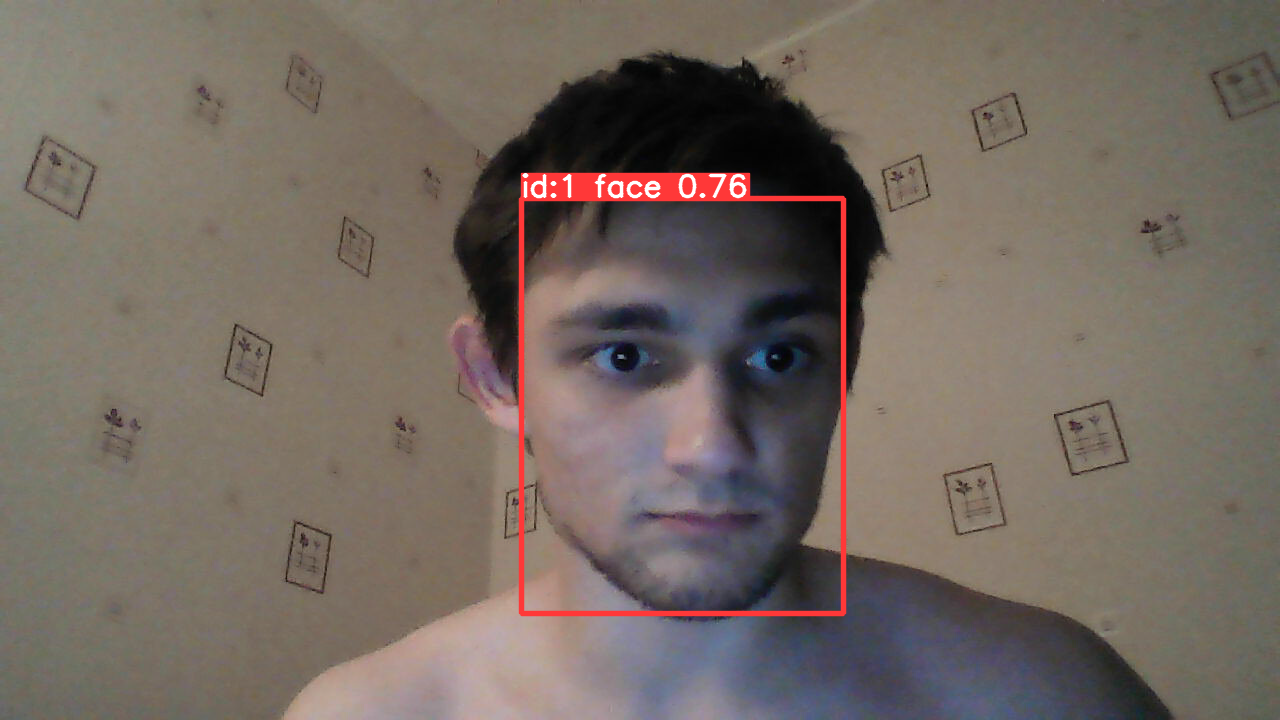

In [3]:
from PIL import Image

Image.fromarray(results[0].plot()[:, :, ::-1])

In [9]:
import os
root_dir = "/home/vorkov/Workspace/EDA/learning/data/UTKFace_resized_childfree_96"
trash_list = []
for filename in os.listdir(root_dir):
    file_path = os.path.join(root_dir, filename)
    results = modelYolo.track(file_path)
    if len(results[0]) != 1:
        trash_list.append(file_path)
        

FileNotFoundError: [Errno 2] No such file or directory: '/home/vorkov/Workspace/EDA/learning/data/UTKFace_resized_childfree_96'

In [60]:
len(trash_list)

7515

In [67]:
for filename in trash_list:
    os.remove(filename)